# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Инструкция по выполнению проекта:

Шаг 1. Откройте файл с данными и изучите общую информацию

Шаг 2. Подготовьте данные
- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
 - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
 - Опишите причины, которые могли привести к пропускам;
 - Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

Шаг 3. Проведите исследовательский анализ данных
- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- осмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Шаг 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Шаг 5. Проверьте гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.

Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

Шаг 6. Напишите общий вывод

Оформление: Выполните задание в Jupyter Notebook. Заполните программный код в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.

## Общая информация

In [290]:
#загружаем библиотеки
import numpy as np
import pandas as pd
#для построения графиков
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
#для проверки гипотез
from scipy import stats as st
import scipy.stats as st
from functools import reduce
idx = pd.IndexSlice

In [291]:
#загружаем датафреймы
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [292]:
data.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
4751,BlazBlue: Continuum Shift,PS3,2010.0,Fighting,0.21,0.07,0.09,0.04,87.0,8,T
12212,Destrega,PS,1998.0,Fighting,0.04,0.03,0.00,0.00,NaN,NaN,NaN
15830,Mary King's Riding School 2,Wii,2009.0,Simulation,0.00,0.02,0.00,0.00,NaN,NaN,NaN
14122,Sins of a Solar Empire: Trinity,PC,2010.0,Strategy,0.00,0.03,0.00,0.01,NaN,7.9,T
11337,Ultimate Brain Games,GBA,2003.0,Misc,0.06,0.02,0.00,0.00,80.0,8.3,E
14583,Pet Alien: An Intergalactic Puzzlepalooza,DS,2007.0,Action,0.03,0.00,0.00,0.00,58.0,tbd,E
12250,12-Sai. Honto no Kimochi,3DS,2014.0,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
14937,Pro Yakyuu Family Stadium,Wii,2008.0,Sports,0.00,0.00,0.03,0.00,NaN,NaN,NaN
12645,Jumper: Griffin's Story,X360,2008.0,Action,0.05,0.00,0.00,0.00,29.0,3.3,T
13359,Raze's Hell,XB,2005.0,Shooter,0.04,0.01,0.00,0.00,71.0,8.1,M


In [293]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [294]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

**Вывод: у нас имеется один датафрейм, который мы загрузили в переменную `data`. Данный датафрейм нуждается в предобработке - необходимо устранить пропущенные значения, нужно заменить названия столбцов (привести к нижнему регистру), заменить тип данных (год выпуска и оценки пользователей), обработать пропущенные значения в оценках критиков, пользователей и в рейтинге ESRB, проверить на явыне и не явные дубликаты.**

## Подготовка данных

Приведем названия стобцов к нижнем регистру:

In [295]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [296]:
data.columns = data.columns.str.lower()

Приведем к нижнему регистру все значения столбцов, которые содержат текст:

In [297]:
list_to_lower = ['name','platform','genre','rating']
for column in list_to_lower:
    data[column] = data[column].str.lower()

In [298]:
#Столбец name
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видим отсутствие наименований игр в столбце `name`. Думаю, что заменить данные значения чем-то другим не представляется возможным. Учитывая, что таких строк всего 2 - удалим их. 

In [299]:
data = data.dropna(subset = ['name'])

После удаления строк с пропущенными значениями в столбце `name` - удалились строки с наименованием жанров этих игр, поэтому столбец `genre` не требует предобработки. 

In [300]:
#Столбец year_of_release
print(data['year_of_release'].isna().sum())
print('Доля пропущенных значений ', round(data['year_of_release'].isna().sum()/data.shape[0],3))
data[data['year_of_release'].isna()].sample(10)

269
Доля пропущенных значений  0.016


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15675,cabela's alaskan adventure,ps2,NaN,sports,0.01,0.01,0.00,0.00,NaN,NaN,NaN
14449,fullmetal alchemist: brotherhood,psp,NaN,action,0.00,0.00,0.03,0.00,NaN,NaN,NaN
6266,indy 500,2600,NaN,racing,0.26,0.01,0.00,0.00,NaN,NaN,NaN
12209,build-a-bear workshop: friendship valley,wii,NaN,misc,0.06,0.00,0.00,0.00,NaN,tbd,e
11622,happy feet two,wii,NaN,action,0.06,0.01,0.00,0.01,NaN,NaN,NaN
4648,tera,pc,NaN,role-playing,0.25,0.12,0.00,0.05,77.0,6.8,m
9876,major league baseball 2k6,psp,NaN,sports,0.11,0.00,0.00,0.01,69.0,tbd,e
3024,"the chronicles of narnia: the lion, the witch ...",gba,NaN,action,0.48,0.18,0.00,0.01,66.0,6.8,e
11016,samurai shodown anthology,psp,NaN,fighting,0.08,0.00,0.00,0.01,NaN,tbd,t
3289,advance wars: days of ruin,ds,NaN,strategy,0.43,0.12,0.00,0.05,86.0,8.7,e10+


Часть пропущенных значений в `year_of_release` можно заполнить годом выпуска, указанным в наименовании игры. На некоторых платформах проставлен год выпуска - также используем эти значения. Учитывая то, что доля пропусков мала - удалим пропущенные значения и переведём тип данных в `int`.

In [301]:
data = data.dropna(subset = ['year_of_release'])
data.year_of_release = data.year_of_release.astype('int')

Столбцы `critic_score`, `user_score` не будем заполнять значениями, так как при построении распределений эти медианные значения формируют не естественное представление. В `user_score` уберем из столбца значения из `tbd` - оно расшифровывается как "to be determined" ("предстоит определить"). Возможно, рейтинг пользователей по этим играм не собирался или не попал в наш датафрейм по ошибке. Заменим эти значения на `NaN` и поменяем тип данных на `float`.

In [302]:
#Столбец user_score
data['user_score'].replace("tbd", np.NaN, inplace = True)
data['user_score'] = data['user_score'].astype('float')

Столбец `rating` оставим без заполнения. Значения в нём являются категориальными - это означает, что средними или медианными значениями заполнить его нельзя и его заполнение может повлиять на статистику.

Проверим датафрейм на наличие явных и неявных дубликатов:

In [303]:
data.duplicated().sum()

0

Явных дубликатов не обнаружено.

In [304]:
data['name'].value_counts().sample(20)

super mario land 2: 6 golden coins                               1
horse life adventures                                            2
g1 grand prix                                                    1
kono aozora ni yakusoku o: melody of the sun and sea             1
buzz! the schools quiz                                           1
final fantasy x/x-2 hd remaster                                  1
street fighter alpha: warriors' dreams                           2
007 racing                                                       1
ping pals                                                        1
grand theft auto                                                 2
power pro success legends                                        1
my fitness coach                                                 1
yu-gi-oh! 5d's tag force 4                                       1
tony hawk's downhill jam                                         1
guilty gear                                                   

Дубликаты не обнаружены.

In [305]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Посчитаем суммарные продажи во всех регионах:

In [306]:
data['general_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**Вывод: была проведена предобработка данных исходного датафрейма, особых проблем обнаружено не было.** 

- были изменены типы столбцов на соответствующие им.
- удалены две строки без названия игр.
- пропущенные значения столбцов `critic_score`, `user_score` были заменнены медианными значениями. 
- пропуски в столбце year_of_release были удалены.

**Данные прошли предобработку и готовы к дальнейшему исследованию.** 

## Исследовательский анализ данных

Количество выпущенных игр по годам:

Последовательно рассмотрим следующие вопросы:

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- осмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Рассмотрим первый вопрос ("Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?"):

In [307]:
year_of_release_pivot_table = pd.pivot_table(data, index='year_of_release', values='name', aggfunc='count')
year_of_release_pivot_table.columns = ['games_count']
year_of_release_pivot_table

,games_count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Text(0.5, 0.98, 'Количество игр по годам выпуска')

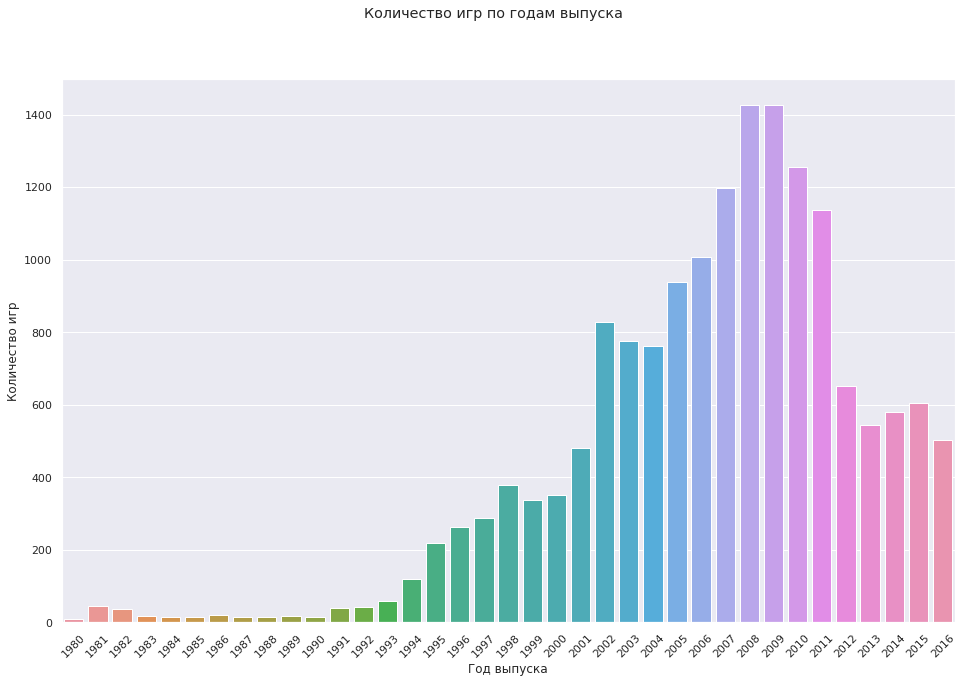

In [308]:
sns.countplot( x = 'year_of_release', data = data).set(xlabel = 'Год выпуска', ylabel = 'Количество игр')
plt.xticks(rotation = 45);
fig = plt.gcf()
fig.set_size_inches(16, 10)
fig.suptitle('Количество игр по годам выпуска')

In [309]:
#топ годов
data.groupby('year_of_release')['name'].count().sort_values(ascending=False).head(10)

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
Name: name, dtype: int64

In [310]:
#хвост годов
data.groupby('year_of_release')['name'].count().sort_values(ascending=False).tail(15)

year_of_release
1994    121
1993     60
1981     46
1992     43
1991     41
1982     36
1986     21
1989     17
1983     17
1990     16
1987     16
1988     15
1985     14
1984     14
1980      9
Name: name, dtype: int64

Данные по всем периодам не важны.

- с 1980 годов по 1993 - было мало компаний, небольшой охват игроков, и мало качественных оценок от критиков. Технологический прорыв, возникший в результате появления персонального компьютера (PC) и технологий языков программирования повлиял на выпуск большего кол-ва игр.

- в 2002 году видно, что год был "богат" на игры. Это значит в период с 1994 по 2002 появились игровые технологии для создания игр и новые языки программирования, что упрощало компаниям порог вхождения в игровую индустрию.

- пик в 2008-2009 года выпуска игр скорее всего связан с появлением бесплатных игровых движков (game engine). Это увеличило популярность создания компьютерных игр, и также развитие новых игровых движков (некоторые из которых бесплатны к использованию на сегодняшний день).

- наблюдаем явный спад игровой индустрии с 2012 по 2016 года. Думаю, это обусловлено мировым экономическим кризисом (2012 года) и возросшими требованиям к игре от игроков. Крупные студии-разработчики вкладывают огромные средства на разработку игр и длительность разработки кратно возрастает, так как хотят порадовать своих фанатов новым гемплеем, современными технологиями и новой графикой.

Учитывая, что до 1995 года, количество выпущенных игр мало (до 1994 года количество релизов в год не превышало 100, и эти данные сложно назвать актуальными) - в связи с уровнем развития игровой индустрии и учитывая то, что это количество не повлияет на наш анализ, далее будем рассматривать игры, выпущенные после 1994 года:

Text(0.5, 0.98, 'Количество игр по годам выпуска')

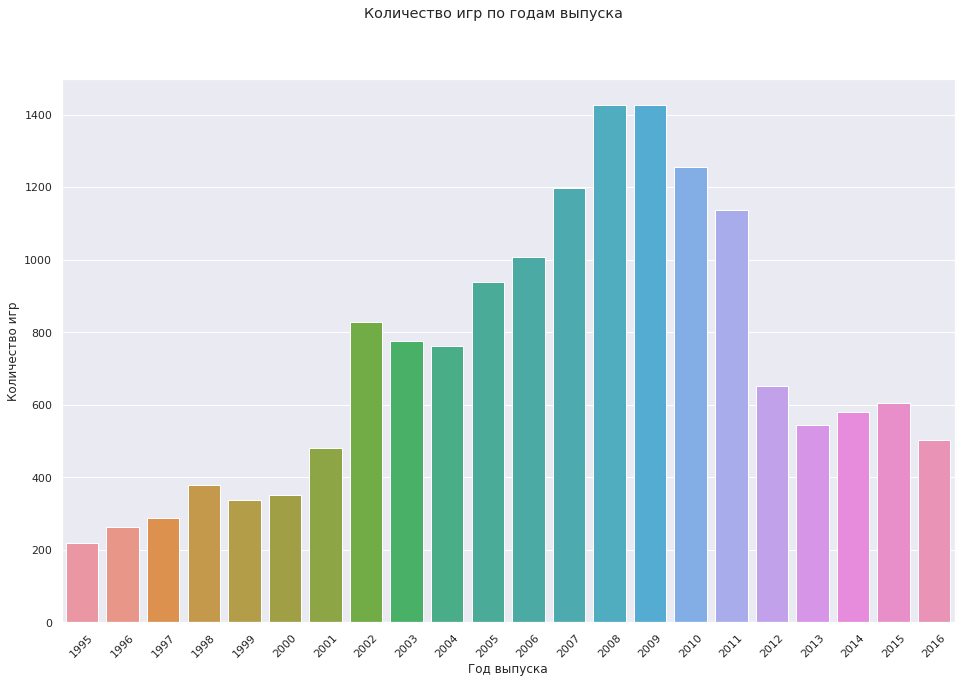

In [311]:
sns.countplot( x = 'year_of_release', data = data[data['year_of_release']>1994])\
.set(xlabel = 'Год выпуска', ylabel = 'Количество игр')
plt.xticks(rotation = 45);
fig = plt.gcf()
fig.set_size_inches(16, 10)
fig.suptitle('Количество игр по годам выпуска')

Рассмотрим второй вопрос ("Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?").

Количество игр вышедших на платформах:

Text(0.5, 0.98, 'Количество игр вышедших на платформах')

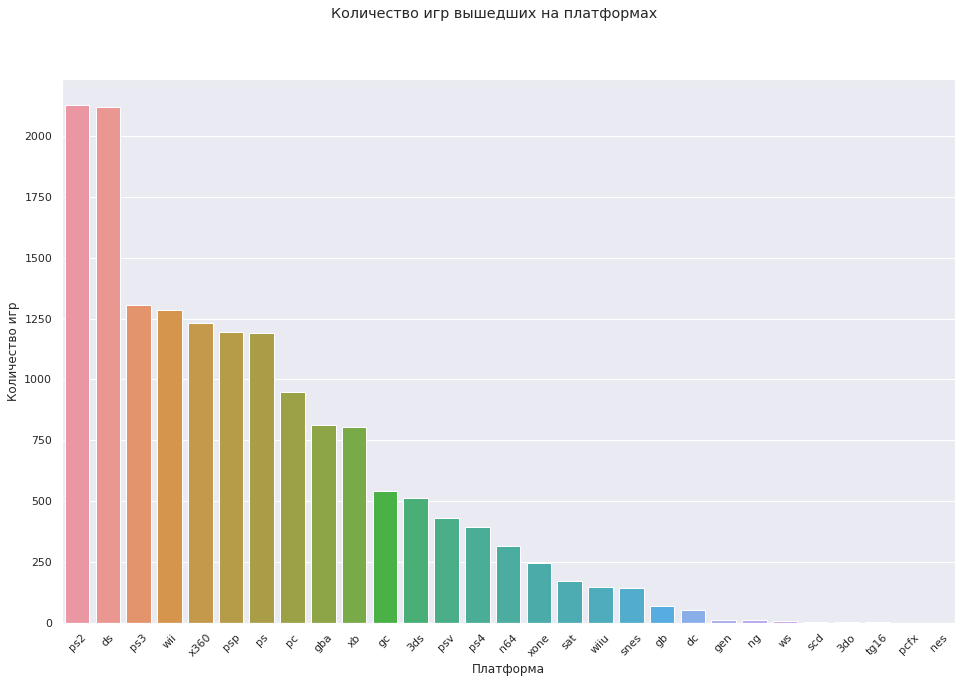

In [312]:
platform_count = data[data['year_of_release']>=1994].\
              pivot_table(index = 'platform', values = 'name', aggfunc = 'count')\
              .sort_values('name', ascending = False)
sns.barplot(x = platform_count.index, y = 'name', data = platform_count)\
              .set(xlabel = 'Платформа', ylabel = 'Количество игр')
plt.xticks(rotation = 45);
fig = plt.gcf()
fig.set_size_inches(16, 10)
fig.suptitle('Количество игр вышедших на платформах')

Количество продаж:

Text(0.5, 0.98, 'Количество продаж игр на платформах')

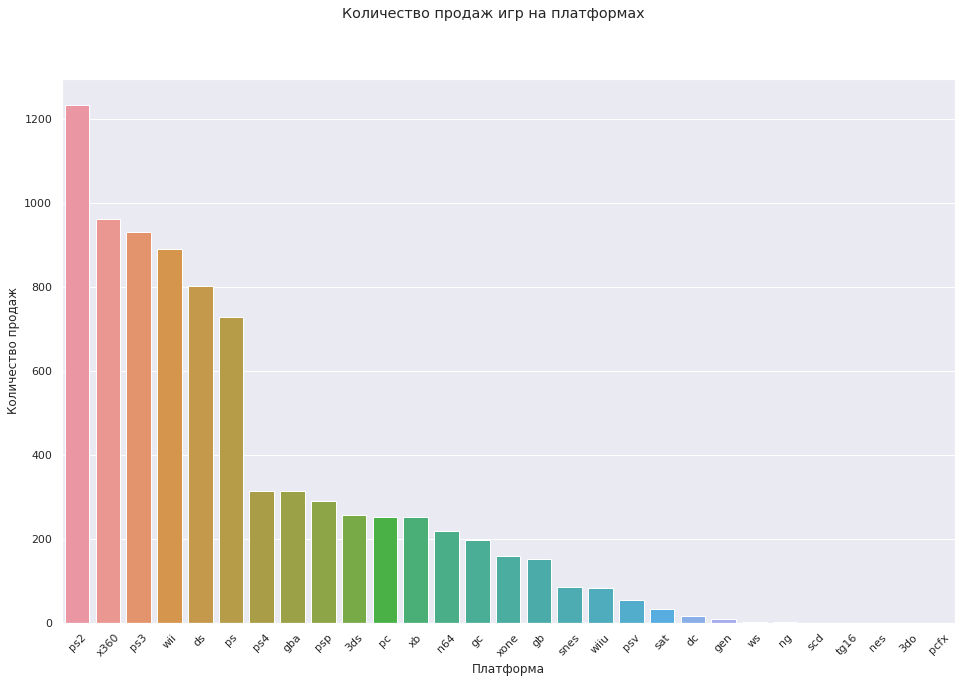

In [313]:
platform_sum = data[data['year_of_release']>=1994].\
              pivot_table(index = 'platform', values = 'general_sales', aggfunc = 'sum')\
              .sort_values('general_sales', ascending = False)
sns.barplot(x = platform_sum.index, y = 'general_sales', data = platform_sum)\
              .set(xlabel = 'Платформа', ylabel = 'Количество продаж')
plt.xticks(rotation = 45);
fig = plt.gcf()
fig.set_size_inches(16, 10)
fig.suptitle('Количество продаж игр на платформах')

In [314]:
timeseries = data.pivot_table(index='year_of_release', columns='platform', values='general_sales', aggfunc='sum')
timeseries.fillna(0, inplace=True)

Выберем платформы с наибольшими глобальными продажами, например, первые 10 и построим распределение по годам:

In [315]:
top10 = data.pivot_table(index='platform', values='general_sales', aggfunc='sum').nlargest(10, 'general_sales')
top10

,general_sales
platform,
ps2,1233.56
x360,961.24
ps3,931.34
wii,891.18
ds,802.78
ps,727.58
ps4,314.14
gba,312.88
psp,289.53


Видим, что в числе лидеров PS2, X360 и PS3.

Для построения графика изменений продаж по каждой платформе в зависимости от года мы создадим цикл, который передаст все данные по лидерам продаж из исходного датафрейма.

Для начала определим лидеров продаж и создадим из них список:

In [316]:
#Переменная, хранящая список из 10 лидеров продаж
leader_platform = data.groupby('platform')['general_sales'].sum().sort_values(ascending = False)[:10].index.tolist()

#Переменная, которая будет содержать данные нашиз лидеров продаж
data_leader_platform = pd.DataFrame(columns = data.columns.tolist())

print('Список платформ с наибольшей суммой продаж -', leader_platform)

Список платформ с наибольшей суммой продаж - ['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps', 'ps4', 'gba', 'psp', '3ds']


In [317]:
#Наполняем наш новый датафрейм данными из исходного по лидерам продаж
for name_platform in leader_platform:
    data_leader_platform = data_leader_platform.append(data[data['platform'] == name_platform])
    
#Группируем таблицу по нужным нам для графикам параметрам
data_leader_platform = data_leader_platform.pivot_table(index = ['platform','year_of_release'], values = 'general_sales',\
                                                 aggfunc = 'sum').reset_index()
data_leader_platform

,platform,year_of_release,general_sales
0,3ds,2011,63.20
1,3ds,2012,51.36
2,3ds,2013,56.57
3,3ds,2014,43.76
4,3ds,2015,27.78
...,...,...,...
92,x360,2012,99.74
93,x360,2013,88.58
94,x360,2014,34.74
95,x360,2015,11.96


Строим графики продаж в зависимости от года по каждой платформе:

Text(0.5, 0.98, 'Сумма продаж игр в зависимости от года по платформам')

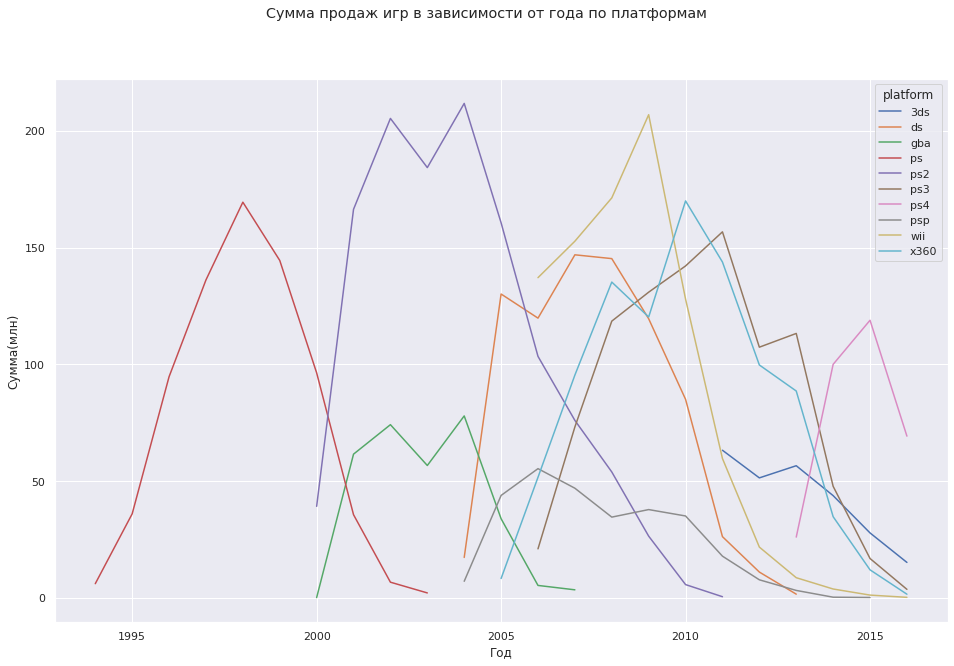

In [318]:
sns.lineplot(x='year_of_release', y = 'general_sales', \
             data = data_leader_platform[data_leader_platform['year_of_release']>1990], hue = 'platform')\
             .set(xlabel = 'Год', ylabel = 'Сумма(млн)');
fig = plt.gcf()
fig.set_size_inches(16, 10)
fig.suptitle('Сумма продаж игр в зависимости от года по платформам')

**Вывод: мы определили ТОП-10 платформ с наибольшими продажами игр - `PS2, X360, PS3, Wii, DS, PS, PS4, GBA, PSP, 3DS`. Как видно из графиков, платформы существуют на рынке примерно 10 лет, после чего покупка игр на эти платформы прекращается. Пик продаж/популярности настаёт примерно через 3 года после выпуска первых игр.**

Рассмотрим третий вопрос ("Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.").

***Поиск актуального периода времени для построения прогноза на 2017 год.***

Поскольку мы выяснили, что в среднем платформа живет около 10 лет, то за актуальный период можно взять 2005-2016 гг. Также этот период показателен платформами с крупными продажами, но так как пик продаж приходит через 3 года от момента релиза - то, следовательно, необходимо взять диапазон крайних 3 лет.

***Выбор потенциально прибыльных платформ***

У платформ `PS2, X360, PS3, Wii, DS, PS` к концу периода датафрейма продажи упали, что объясняется их устареванием. Необходимо найти платформы, которые будут иметь максимальный рост за первые 3 года существования - это будет говорить нам о том, что следующий 2017 год будет либо примерно таким же, либо лучше по продажам. Для этого построим графики по оставшимся платформам с датой релиза больше 2013 года.

Text(0.5, 0.98, 'Сумма продаж игр по платформам больше 2013 года')

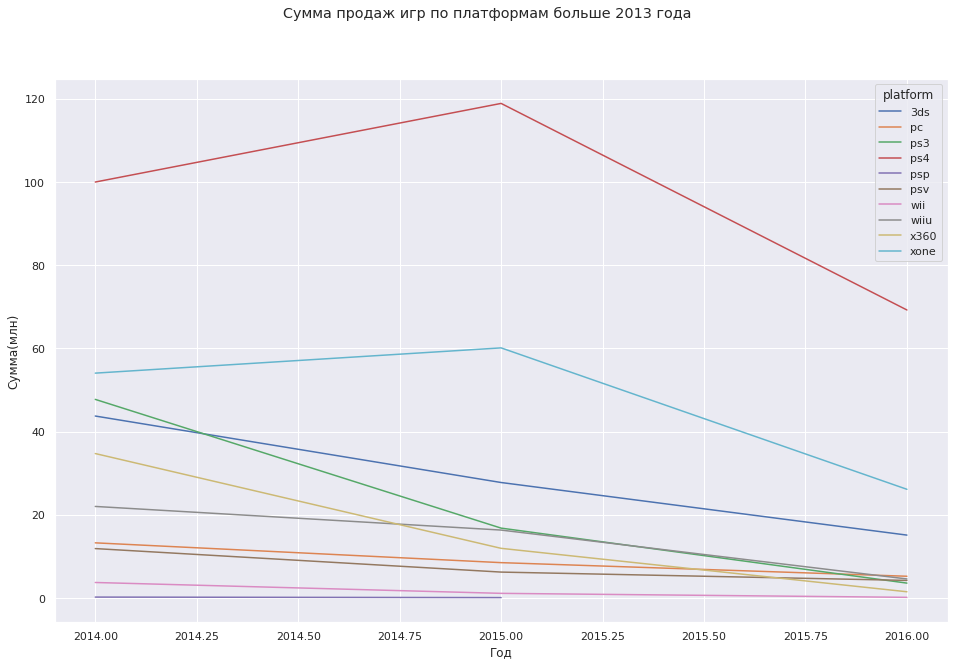

In [319]:
new_platform = data[data['year_of_release']>2013].pivot_table(index = ['platform', 'year_of_release'],\
                                                                         values = 'general_sales', aggfunc = 'sum').\
                                                                         reset_index()
sns.lineplot(x = 'year_of_release', y = 'general_sales', data = new_platform, hue = 'platform')\
.set(xlabel = 'Год', ylabel = 'Сумма(млн)');
fig = plt.gcf()
fig.set_size_inches(16, 10)
fig.suptitle('Сумма продаж игр по платформам больше 2013 года')

**Вывод: по данным видно, что практически все платформы находятся в стадии снижения показателей по продажам. В своей активной коммерческой фазе пребывают платформы `PS4` и `XOne` (больше всего продаж за последние 3 года), тогда как лидеры по продажам 2013 года: `PS3`, `3DS` и `X360` — к 2015-2016 гг. уже существенно исчерпали свой коммерческий ресурс.**

***Построение диаграмм размаха по глобальным продажам игр в разбивке по платформам***

Дальнейшее исследование будет проводиться для периода больше 2013 года.

In [320]:
data = data[data['year_of_release']>2013]
data['rating'].fillna('unknown', inplace = True)

Text(0.5, 0.98, 'Диаграмма размаха по глобальным продажам игр в разбивке по платформам')

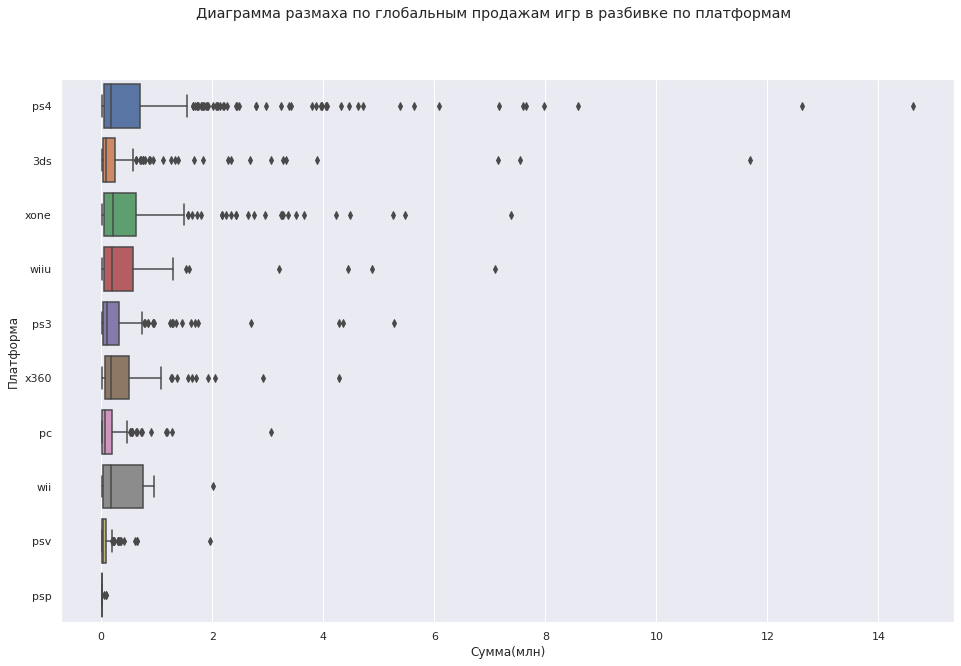

In [321]:
#Полная диаграмма размаха
sns.boxplot(x= data['general_sales'], y = data['platform'])\
.set(xlabel = 'Сумма(млн)', ylabel = 'Платформа');
fig = plt.gcf()
fig.set_size_inches(16, 10)
fig.suptitle('Диаграмма размаха по глобальным продажам игр в разбивке по платформам')

Text(0.5, 0.98, 'Диаграмма размаха по глобальным продажам игр в разбивке по платформам')

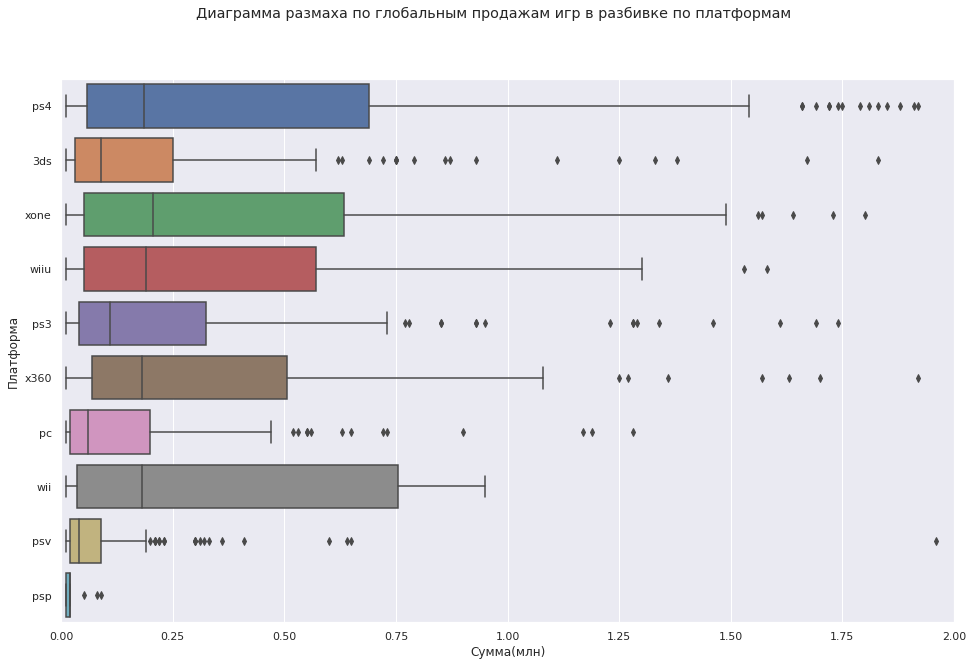

In [322]:
#Диаграмма размаха с ограничением по оси X
sns.boxplot(x= data['general_sales'], y = data['platform'])\
.set(xlim = [0,2], xlabel = 'Сумма(млн)', ylabel = 'Платформа');
fig = plt.gcf()
fig.set_size_inches(16, 10)
fig.suptitle('Диаграмма размаха по глобальным продажам игр в разбивке по платформам')

**Вывод: из диаграммы разброса видно, что у всех платформ много выбросов - это игры, которые пользовались большой популярностью. Самое большое медианное значение по продажам у `XOne`, затем с небольшой разницей у `PS4`, `X360`, `WiiU`, `Wii` что говорит не только больших продажах, но и о плотности этих продаж. Перспективными платформами на 2017 год явлются `XOne` и `PS4`.**

***Влияние отзывов пользователей и критиков***

Для определения влиния отзывов и оценок пользователей и критиков возьмём популярную за последние 3 года платформу XOne, построим диаграммы и посчитаем корреляцию интересующих переменных по ней:

In [323]:
data[data['platform']=='xone'].year_of_release.min()

2014

Корреляция продаж от оценки критиков равна  0.429
Корреляция продаж от оценки игроков -0.07


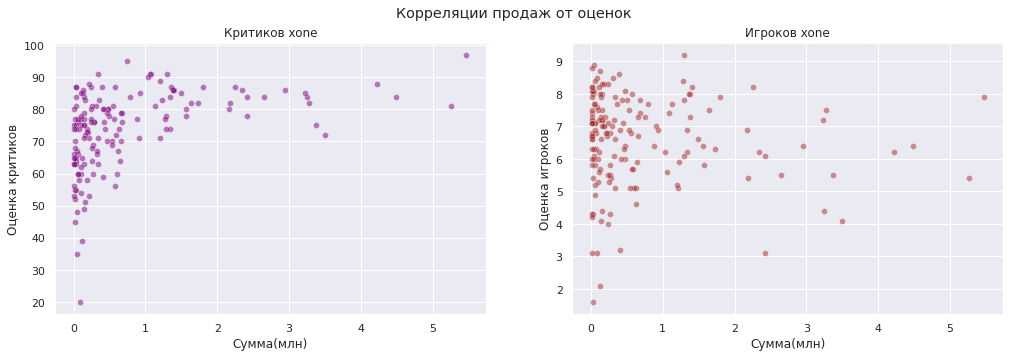

In [324]:
fig, axes = plt.subplots(1,2, sharey = False, figsize = (17,5))
fig.suptitle('Корреляции продаж от оценок')
axes[0].set_title('Критиков xone')
axes[1].set_title('Игроков xone')

# Корреляция продаж и оценок критиков
sns.scatterplot(ax = axes[0], x='general_sales', y='critic_score', data = data[data['platform']=='xone'],\
                alpha = 0.5, color='purple')\
.set(xlabel = 'Сумма(млн)', ylabel = 'Оценка критиков');
print('Корреляция продаж от оценки критиков равна ',\
      round(data[data['platform']=='xone']['general_sales'].\
            corr(data[data['platform']=='xone']['critic_score']),3))

# Корреляция продаж и оценок игроков
sns.scatterplot(ax = axes[1], x='general_sales', y='user_score', data = data[data['platform']=='xone'],\
               alpha = 0.5, color='brown')\
.set(xlabel = 'Сумма(млн)', ylabel = 'Оценка игроков');
print('Корреляция продаж от оценки игроков',\
      round(data[data['platform']=='xone']['general_sales'].\
            corr(data[data['platform']=='xone']['user_score']),3))

Рассмотрим корреляции продаж от отзывов критиков и игроков для ТОП-3 платформ по продажам

Корреляция продаж ps4 от оценки критиков равна  0.403
Корреляция продаж ps4 от оценки игроков -0.04
Корреляция продаж xone от оценки критиков равна  0.429
Корреляция продаж xone от оценки игроков -0.07
Корреляция продаж 3ds от оценки критиков равна  0.314
Корреляция продаж 3ds от оценки игроков 0.215


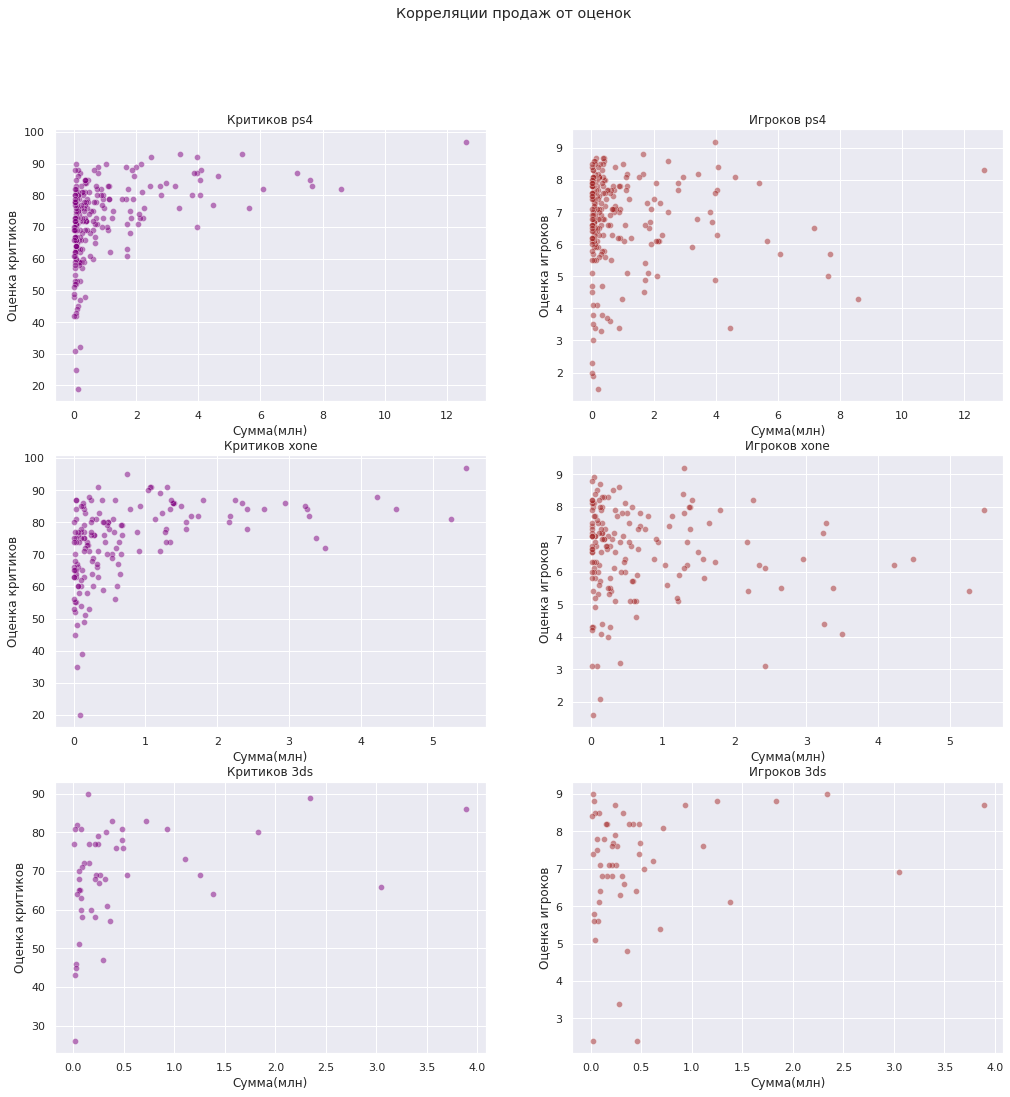

In [325]:
top_platform_last = data.groupby('platform')['general_sales'].sum().sort_values(ascending = False)[:4].index.tolist()
fig, axes = plt.subplots(3,2, sharey = False, figsize=(17, 17))
fig.suptitle('Корреляции продаж от оценок')

#Перебираем наименования ТОП-3 платформ по столбцам графиков, сначала для критиков, потом для игроков.
for platform, i in zip(top_platform_last, range(0,3)):
    
# Корреляция продаж и оценок критиков
    axes[i,0].set_title(f'Критиков {platform}')
    sns.scatterplot(ax = axes[i,0], x='general_sales', y='critic_score', data = data[data['platform']==platform],\
                    alpha = 0.5, color='purple')\
.set(xlabel = 'Сумма(млн)', ylabel = 'Оценка критиков');
    print(f'Корреляция продаж {platform} от оценки критиков равна ',\
          round(data[data['platform']==platform]['general_sales'].\
          corr(data[data['platform']==platform]['critic_score']),3))
    
# Корреляция продаж и оценок игроков
    axes[i,1].set_title(f'Игроков {platform}')
    sns.scatterplot(ax = axes[i,1], x='general_sales', y='user_score', data = data[data['platform']==platform],\
                    alpha = 0.5, color='brown')\
.set(xlabel = 'Сумма(млн)', ylabel = 'Оценка игроков');
    print(f'Корреляция продаж {platform} от оценки игроков',\
          round(data[data['platform']==platform]['general_sales'].\
          corr(data[data['platform']==platform]['user_score']),3))

**Вывод: корреляция продаж с оценками критиков выше чем с оценками игроков за последние 3 года. Это указывает на то, что мнение критиков учитывается и ему доверяют больше ввиду их профессионализма и компетентности, чем обычным игрокам. Корреляция положительная - чем выше оценки критиков тем больше продаж игр. Построим таблицу корреляций для всех платформ.**

In [326]:
data[['general_sales','user_score','critic_score']].corr()

,general_sales,user_score,critic_score
general_sales,1.000000,-0.01307,0.328105
user_score,-0.013070,1.00000,0.504460
critic_score,0.328105,0.50446,1.000000


Вывод подтверждается - для всех платформ за последние 3 года корреляция продаж с оценками критиков выше чем с оценками игроков.

***Анализ распределения игр по жанрам***

Общее распределение игр по жанрам.

In [327]:
genre_sales = data.groupby('genre').agg({'name':'count','general_sales':['median','sum']})

In [328]:
genre_sales.columns = ['count', 'median','sum']

In [329]:
genre_sales = genre_sales.sort_values(by = 'sum', ascending = False)

In [330]:
genre_sales

,count,median,sum
genre,,,
action,619,0.090,199.36
shooter,128,0.515,170.94
sports,161,0.180,109.48
role-playing,221,0.110,101.44
misc,113,0.090,37.55
fighting,60,0.125,28.22
racing,69,0.090,27.52
platform,38,0.140,18.09
adventure,185,0.030,17.55


Можно заметить, что не всегда количество игр жанра гарантирует хорошие продажи. Например, в жанре `Adventure` выпущено много игр, но они имеют очень маленькое медианное значение продаж. Так же можно увидеть, что существуют обратные случаи, когда медианное значение продаж приближается к максимальному, среди всех жанров, но количество игр очень маленькое - примером может служить жанр `Simulation`. Если рассматривать только самые прибыльные жанры, то можно заметить, что в них сочетаются два параметра - большое количество игр и высокое медианное значение.

Text(0.5, 0.98, 'Столбчатая диаграмма количества игр по жанрам')

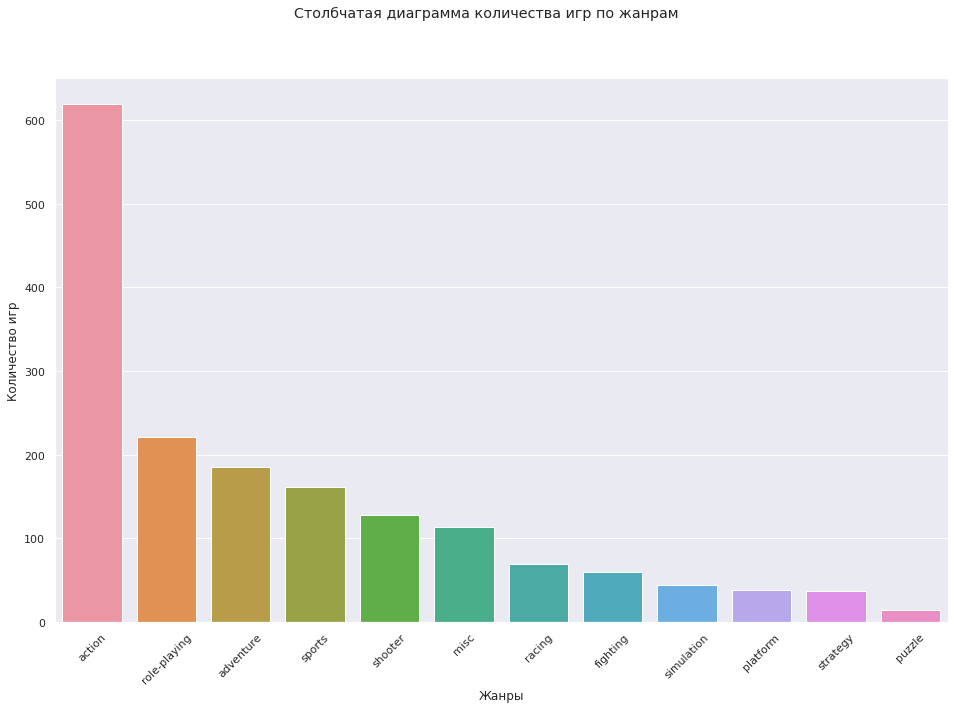

In [331]:
#Столбчатая диаграмма количества игр по жанрам
genre_count = data.pivot_table(index = 'genre', values = 'name', aggfunc = 'count').sort_values('name', ascending = False)
sns.barplot(x = genre_count.index, y = 'name',  data = genre_count).set(xlabel = 'Жанры', ylabel = 'Количество игр')
plt.xticks(rotation = 45);
fig = plt.gcf()
fig.set_size_inches(16, 10)
fig.suptitle('Столбчатая диаграмма количества игр по жанрам')

Text(0.5, 0.98, 'Столбчатая диаграмма игр по жанрам и продажам')

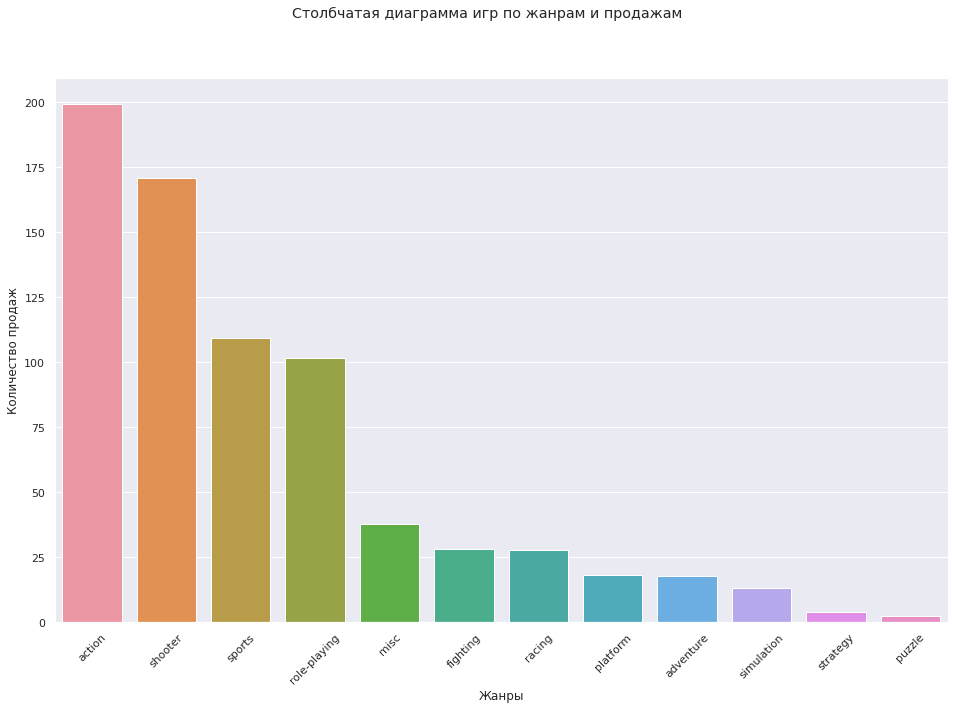

In [332]:
#Столбчатая диаграмма игр по жанрам и продажам
genre_sale = data.pivot_table(index = 'genre', values = 'general_sales', aggfunc = 'sum')\
                       .sort_values('general_sales', ascending = False)
sns.barplot(x = genre_sale.index, y = 'general_sales', data = genre_sale).set(xlabel = 'Жанры', ylabel = 'Количество продаж')
plt.xticks(rotation = 45);
fig = plt.gcf()
fig.set_size_inches(16, 10)
fig.suptitle('Столбчатая диаграмма игр по жанрам и продажам')

Text(0.5, 0.98, 'Диаграмма размаха по глобальным продажам игр в разбивке по жанрам')

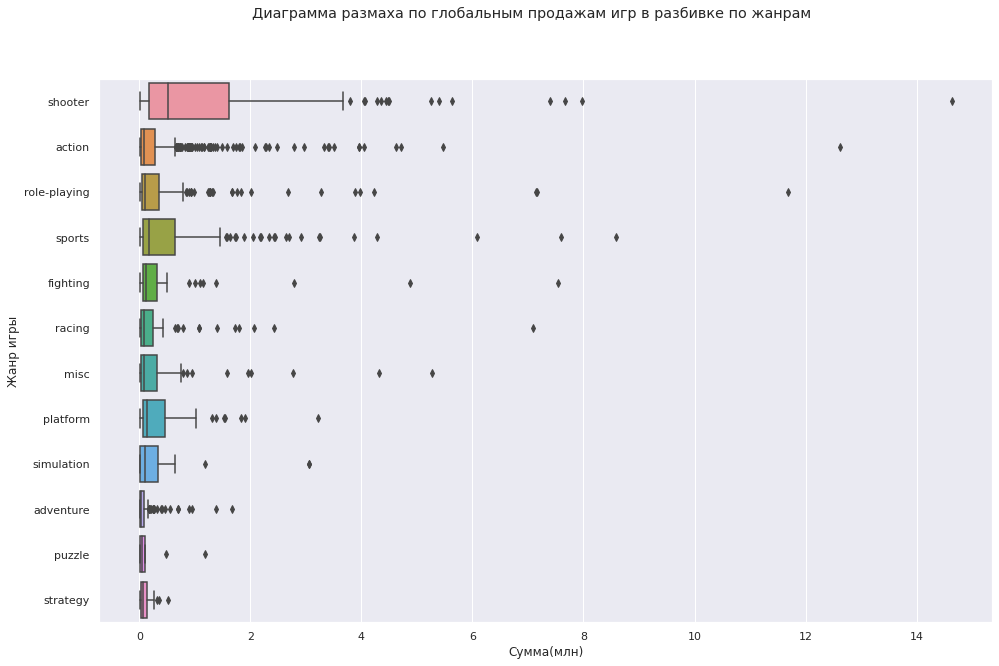

In [333]:
sns.boxplot(x= data['general_sales'], y = data['genre'])\
.set(xlabel = 'Сумма(млн)', ylabel = 'Жанр игры');
fig = plt.gcf()
fig.set_size_inches(16, 10)
fig.suptitle('Диаграмма размаха по глобальным продажам игр в разбивке по жанрам')

Text(0.5, 0.98, 'Диаграмма размаха по глобальным продажам игр в разбивке по жанрам')

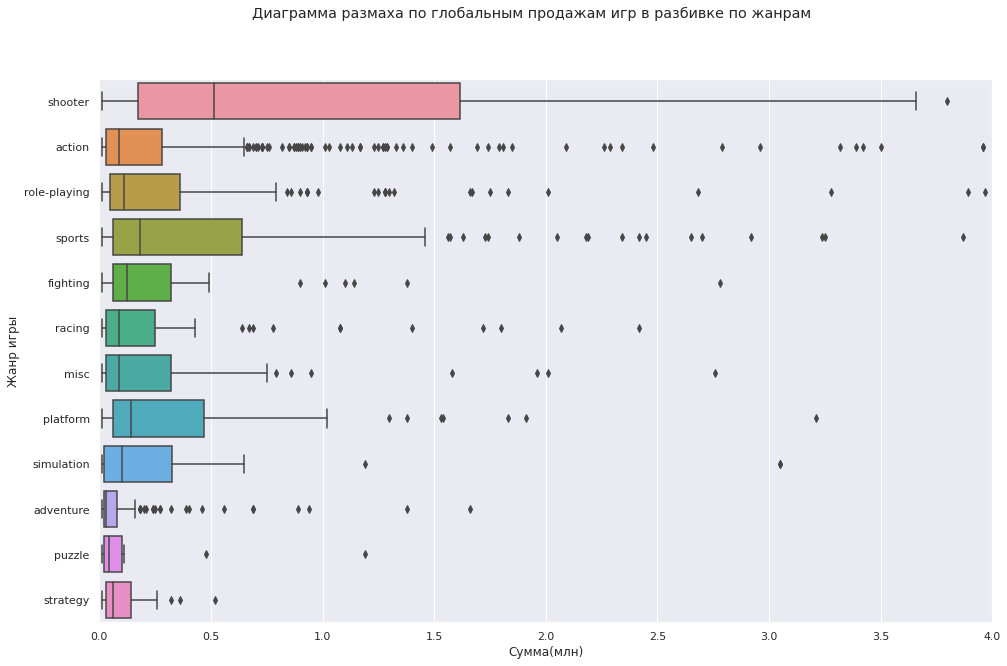

In [334]:
sns.boxplot(x= data['general_sales'], y = data['genre'])\
.set(xlim = [0,4], xlabel = 'Сумма(млн)', ylabel = 'Жанр игры');
fig = plt.gcf()
fig.set_size_inches(16, 10)
fig.suptitle('Диаграмма размаха по глобальным продажам игр в разбивке по жанрам')

**Вывод: за последние 3 года не смотря на то, что больше всего выпущено игр жанра `Action`, наблюдаем большое количество продаж игр среди жанров `Shooter`. Думаю это связано с тем, что это наиболее популярные жанры среди игроков. Меньше всего продаются игры с жанром `Adventure`, хотя этот жанр на 3 месте по количеству игр. Видимо, большинство разрабатываемых игр не пользуются большой популярностью.**

## Портрет пользователя каждого региона

Составим портреты пользователя для отдельных регионов (Северная Америка, Европа, Япония):
- cамые популярные платформы (топ-5). Опишите различия в долях продаж.
- cамые популярные жанры (топ-5). Поясните разницу.
- влияет ли рейтинг ESRB на продажи в отдельном регионе?

***Самые популярные платформы (топ-5)***

In [335]:
#Функция замены значений столбца датафрейма, которые не входят в ТОП-5
def other(variable, top):
    if variable not in top:
        return 'other'
    else:
        return variable

In [336]:
#Формируем списки ТОП-5 платформ по каждому региону, что бы их потом передать, как аргумент функции other
top_platform_na = data.groupby('platform')['na_sales'].sum().sort_values(ascending = False)[:5].index.tolist()
top_platform_eu = data.groupby('platform')['eu_sales'].sum().sort_values(ascending = False)[:5].index.tolist()
top_platform_jp = data.groupby('platform')['jp_sales'].sum().sort_values(ascending = False)[:5].index.tolist()

#Формируем столбцы, которые будут содержать только значения ТОП-5 платформ каждого региона, 
#а остальные значения будут названы как other
data['top_platform_na'] = data.apply(lambda x: other(x.platform, top_platform_na), axis =1)
data['top_platform_eu'] = data.apply(lambda x: other(x.platform, top_platform_eu), axis =1)
data['top_platform_jp'] = data.apply(lambda x: other(x.platform, top_platform_jp), axis =1)

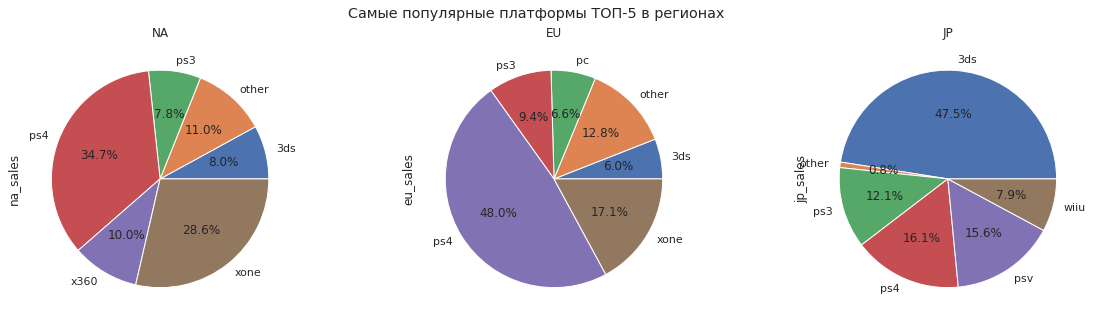

In [337]:
fig, axes = plt.subplots(1,3, figsize = (20,5))
fig.suptitle('Самые популярные платформы ТОП-5 в регионах')
axes[0].set_title('NA')
axes[1].set_title('EU')
axes[2].set_title('JP')
#NA (Северная Америка)
data.groupby('top_platform_na')['na_sales'].sum().plot(ax = axes[0], kind = 'pie', autopct='%1.1f%%')
#EU (Европа)
data.groupby('top_platform_eu')['eu_sales'].sum().plot(ax = axes[1], kind = 'pie', autopct='%1.1f%%')
#JP (Япония)
data.groupby('top_platform_jp')['jp_sales'].sum().plot(ax = axes[2], kind = 'pie', autopct='%1.1f%%');



In [338]:
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    region = data.pivot_table(index='platform', values=column, aggfunc='sum').\
    sort_values(column, ascending=False)
    region['ratio'] = round(region[column] / region[column].sum(), 2)
    print(region.nlargest(5, column))

          na_sales  ratio
platform                 
ps4          98.61   0.35
xone         81.27   0.29
x360         28.30   0.10
3ds          22.64   0.08
ps3          22.05   0.08
          eu_sales  ratio
platform                 
ps4         130.04   0.48
xone         46.25   0.17
ps3          25.54   0.09
pc           17.97   0.07
3ds          16.12   0.06
          jp_sales  ratio
platform                 
3ds          44.24   0.48
ps4          15.02   0.16
psv          14.54   0.16
ps3          11.22   0.12
wiiu          7.31   0.08


Интересно, что если в Америке и Европе набор топ-5 платформ одинаковый и различается только долями, то в Японии топ-5 кардинально другой.

Если в Америке и Европе самой популярной платформой является PS4, то в Японии эта платформа вторая (при этом количество продаж существенно меньше Америки и Европы), а на первом месте в Японии стоит платформа 3DS, которая на Западе, напротив, занимает 4 и 5 место по популярности. Кроме того, в Японии в топ-5 вошла платформа PSV, которая стоит на 3 месте - при этом на Западе в топ-5 PSV вообще не вошла. 

***Самые популярные жанры (топ-5)***

In [339]:
#Формируем списки ТОП-5 жанров по каждому региону, что бы их потом передать, как аргумент функции other
top_genre_na = data.groupby('genre')['na_sales'].sum().sort_values(ascending = False)[:5].index.tolist()
top_genre_eu = data.groupby('genre')['eu_sales'].sum().sort_values(ascending = False)[:5].index.tolist()
top_genre_jp = data.groupby('genre')['jp_sales'].sum().sort_values(ascending = False)[:5].index.tolist()

#Формируем столбцы, которые будут содержать только значения ТОП-5 жанров каждого региона, 
#а остальные значения будут названы как other
data['top_genre_na'] = data.apply(lambda x: other(x.genre, top_genre_na), axis =1)
data['top_genre_eu'] = data.apply(lambda x: other(x.genre, top_genre_eu), axis =1)
data['top_genre_jp'] = data.apply(lambda x: other(x.genre, top_genre_jp), axis =1)

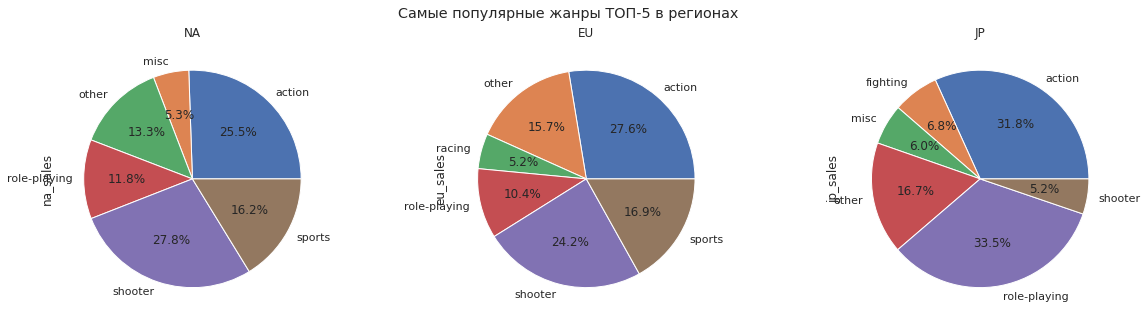

In [340]:
fig, axes = plt.subplots(1,3, figsize = (20,5))
fig.suptitle('Самые популярные жанры ТОП-5 в регионах')
axes[0].set_title('NA')
axes[1].set_title('EU')
axes[2].set_title('JP')
#NA (Северная Америка)
data.groupby('top_genre_na')['na_sales'].sum().plot(ax = axes[0], kind = 'pie', autopct='%1.1f%%')
#EU (Европа)
data.groupby('top_genre_eu')['eu_sales'].sum().plot(ax = axes[1], kind = 'pie', autopct='%1.1f%%')
#JP (Япония)
data.groupby('top_genre_jp')['jp_sales'].sum().plot(ax = axes[2], kind = 'pie', autopct='%1.1f%%');

In [341]:
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    region = data.pivot_table(index='genre', values=column, aggfunc='sum').\
    sort_values(column, ascending=False)
    region['ratio'] = round(region[column] / region[column].sum(), 2)
    print(region.nlargest(5, column))

              na_sales  ratio
genre                        
shooter          79.02   0.28
action           72.53   0.26
sports           46.13   0.16
role-playing     33.47   0.12
misc             15.05   0.05
              eu_sales  ratio
genre                        
action           74.68   0.28
shooter          65.52   0.24
sports           45.73   0.17
role-playing     28.17   0.10
racing           14.13   0.05
              jp_sales  ratio
genre                        
role-playing     31.16   0.33
action           29.58   0.32
fighting          6.37   0.07
misc              5.61   0.06
shooter           4.87   0.05


С жанрами игр ситуация также очень интересная. Жанр Action, очевидно, на первых местах на Западе, в Японии - на втором месте. Топ-5 жанров по продажам в Америке и Европе отличаются лишь 5 местом: Misc в Америке и Racing в Европе. Отличительной особенностью Европы - включение Racing в топ-5, в Японии такой особенностью является популярность Fighting (3 место). Кроме того, в Японии на первом месте по популярности не свойственный западным любителям игр жанр Role-Playing.

***Влияние рейтинга ESRB на продажи в Северной Америке, Европе и Японии***

Рейтинги ESRB (https://www.esrb.org/ratings-guide/):
- E - от 6 лет
- E10+ - от 10 лет
- T - от 13 лет
- M - от 17 лет

In [342]:
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    region = (data[data['rating'] != -1].
              pivot_table(index='rating', values=column, aggfunc='sum').
              sort_values(column, ascending=False)
             )
    region['ratio'] = round(region[column] / region[column].sum(), 2)
    print(region)

         na_sales  ratio
rating                  
m           96.42   0.34
unknown     64.72   0.23
e           50.74   0.18
t           38.95   0.14
e10+        33.23   0.12
         eu_sales  ratio
rating                  
m           93.44   0.35
unknown     58.95   0.22
e           58.06   0.21
t           34.07   0.13
e10+        26.16   0.10
         jp_sales  ratio
rating                  
unknown     56.90   0.61
t           14.78   0.16
e            8.94   0.10
m            8.01   0.09
e10+         4.46   0.05


Запад и Восток вновь отличаются по популярности рейтингов: в Америке и Европе популярностью пользуются игры для лиц старше 17 лет, тогда как на Востоке первое место по продажам принадлежит играм для подростков (от 13 лет и старше). Значит ли это, что на Западе чаще всего играют люди более взрослые, чем на Востоке? Неизвестно, поскольку непонятно, соответствует ли возраст игроков разрешенному рейтингу. Интересно, что взрослые игры в Японии лишь на третьем месте по популярности. Второе место и на Западе, и на Востоке принадлежит рейтингу E. 

Также мы можем увидеть то, что пропуски в рейтингах многочисленны - особенно в Японии (первое место), а также на вторых местах в Северной Америке и Европе - это может говорить о том, что если будут найдены рейтинги к большинству пропущенных значений, то рейтинговая таблица может существенно измениться в пользу определенных жанров игр. Но так как мы работаем с исходным датафреймом - то работаем с теми значениями которые есть.

## Проверка гипотез

***Гипотеза №1***

- H0  — средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

- H1  — средние пользовательские рейтинги платформ Xbox One и PC различаются.

α = 5%

Для оценки гипотезы будем применять тест Стьюдента. Соотвественно, мы можем получить два ответа "Отвергаем нулевую гипотезу" и "Не получилось отвергнуть нулевую гипотезу".

Размер выборок:

In [343]:
data_pc = data[data['platform']=='pc']['user_score'].dropna()
print('Количество значений для платформы PC:', data_pc.shape[0])

Количество значений для платформы PC: 122


In [344]:
data_xone = data[data['platform']=='xone']['user_score'].dropna()
print('Количество значений для платформы XOne:', data_xone.shape[0])

Количество значений для платформы XOne: 165


Для проверки гипотезы применим ttest. Количество данных разное, поэтому equal_var=False.

In [345]:
alpha = 0.05

print('Среднее значение оценок пользователей для платформы XOne', data_xone.mean())
print('Среднее значение оценок пользователей для платформы PC', data_pc.mean())

result = st.ttest_ind(data_xone, data_pc, equal_var = False)

print('Значение p-value ', result.pvalue )

if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Среднее значение оценок пользователей для платформы XOne 6.594545454545456
Среднее значение оценок пользователей для платформы PC 6.298360655737705
Значение p-value  0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


**Вывод: в результате проверки гипотезы используя t-критерий Стьюдента, мы пришли к выводу, что гипотезу о равенстве среднего пользовательского рейтинга для `XOne` и `PC` не получилось отвергнуть. Если бы мы утверждали, что средние рейтинги для этих платформ различаются, мы бы допустили ошибку с вероятностью 12%. Можем сделать вывод, что средние пользовательские рейтинги платформ `XOne` и `PC` практически не отличаются.**

***Гипотеза №2***

- H0  — средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковые.

- H1  — средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

α = 5%

Для оценки гипотезы будем применять тест Стьюдента. Соотвественно, мы можем получить два ответа "Отвергаем нулевую гипотезу" и "Не получилось отвергнуть нулевую гипотезу".

In [346]:
data_action = data[data['genre']=='action']['user_score'].dropna()
print('Количество значений для жанра Action:', data_action.shape[0])

Количество значений для жанра Action: 297


In [347]:
data_sports = data[data['genre']=='sports']['user_score'].dropna()
print('Количество значений для жанра Sports:', data_sports.shape[0])

Количество значений для жанра Sports: 127


Для проверки гипотезы применим ttest. Количество данных разное, поэтому equal_var=False.

In [348]:
print('Среднее значение пользовательской оценки для жанра Action:', data_action.mean())
print('Среднее значение пользовательской оценки для жанра Sports:', data_sports.mean())

result = st.ttest_ind(data_action, data_sports, equal_var = False)

print('Значение p-value = ', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее значение пользовательской оценки для жанра Action: 6.760606060606061
Среднее значение пользовательской оценки для жанра Sports: 5.2251968503937
Значение p-value =  1.1825550382644557e-14
Отвергаем нулевую гипотезу


**Вывод: исходная гипотеза не подтвердилась - можно утверждать с уверенностью 99,99%, что средние пользовательские рейтинги для жанров `Action` и `Sports` различаются. При выборе между продвижением игр двух жанров, при прочих равных условиях, лучше отдать предпочтение жанру `Action`.**

Общий вывод по проверке гипотез: 

- Мы не смогли отвергнуть гипотезу о том, что средние оценки пользователей генеральной совокупности для платформ `XOne` и `PC` одинаковы.

- Мы отвергли гипотезу о том, что средние пользовательских оценок для жанров `Action` и `Sports` одинаковы в пользу гипотезы, что они разные.

- Платформа `XOne` старается из года в год набирать новых пользователей, чтобы соревноваться не только с `PS4`, но и с самой распространненной платформой `PC`. Поэтоу данные платформы находятся примерно на одинаковом рейтинговом уровне.

- Различия между `Action` и `Sports` существуют из-за опыта создания игр. Первые экшены появились одними из первых при создании компьютерных игр (в 80х годах) и из года в год они становятся интересней/качественней и вовлекают все большую аудиторию - так как имеют просто колоссальный опыт разработки подобного жанра игр. У спортивных игр в большинстве случаев ограничением в рейтингах стоит симуляция реальных спортивных игр. И многие любители этой серии иногда сталкиваются с непонятными решениями в этих играх - многие игроки могут знать виды спорта из практического участия в спортивных играх в реальной жизни. 

## Общий вывод

Исходными данным для исследования служили данные из открытых источников - исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Задачей ставилось выявление определяющих успешность игры закономерностей, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании для интернет-магазина компьютерных игр "Стримчик".

По итогам проведённого исследования можем сделать следующие заключения:
- В начале работы мы провели предобработку исходных данных - заменены названия столбцов (приведены к нижнему регистру), изменены типы данных. Обработаны пропуски - пропуски в оценках пользователей и критиков мы не стали заполнять и удалять, чтобы не испортить статистику. Проверили датасет на дубликаты. Рассмотрели аббревиатуру 'tbd' в столбце с оценкой пользователей, разобрали и обработали это значение. Посчитали суммарные продажи во всех регионах и эти данные в отдельный столбец. Проведен анализ по данным и подготовлены актуальные данные.Составлены портреты пользователей для крупных регионов продаж. Выполнены проверки гипотез.
- Выяснили, что больше всего игр выпускалось в 2008 и 2009 годах, возможно потому, что тогда был пик конкуренции среди платформ. Больше всего игр выпустилось на плтаформах PS2 и Nintendo DS, тем не менее тройка лидеров по продажам это PS2, X360, PS3.
- Обнаружили, что пик популярности платформы наступает примерно через 3 года после выпуска, возможно это связано с тем, что к этому периоду игроки переходят на платформы нового поколения. Весь дальнейший анализ проводился за период больше 2013 года.
- Самыми перспективными на 2017 год стали платформы PS4,XOne, хотя в последние годы продажи по всем платформам падают.
- Установили, что оценки критиков больше способствуют продажам нежели оценки пользователей. Оценки пользователей за последние 3 года не имеют почти никакой корреляции с продажами игр. 
- Платформы появляются и умирают в течение 10 лет. Предположительно это обусловлено скачками в технологиях процессора, оперативной и видеопамяти.
- Наиболее популярные на данный момент платформы – это Sony PlayStation 4 и Xbox One. Они появились пару лет назад и имеют потенциал роста.
- В Северной Америке и Европе лучше всего продаются шутеры и экшены. Япония – отдельный рынок с уклоном в портативные консоли и ролевые игры. Также в Японии больше всего продаж приходятся на игры, разрешенные для детей, а в Северной Америке и Европе у наиболее популярных платформ стоит рейтинг M, но явной связи между рейтингом и популярностью не прослеживается.

Подробнее:
 - NA лидирует платформа PS4, затем XOne, жанры Action и Shooter рейтинга М(для взрослых);
 - EU аналогично NA предпочитают игры на PS4, затем XOne, жанра Action и Shooter рейтинга М(для взрослых);
 - JP редпочитают игры на платформе 3DS, затем PS4 жанра Role-Playining и Action, без рейтинга.

По результатам проведённого анализа видно, что рекламный бюджет интернет-магазина "Стримчик" целесообразней потратить на перспективные игры схорошими оценками критиков, перспективных платформ в 2017 году - это PS4, XOne жанров Action и Shooter, рейтинга М в Европе и Северной Америке. А в Японии, лучше потратить рекламный бюджет на игры без рейтинга платформы 3DS, жанров Role-Playining и Action. Также можно порекомендовать не забывать распространять компьютерные игры и портации игр с популярных платформ на PC. Компьютер еще долго не выйдет из конкуренции за игроков.

💡 Стоит помнить, что у каждой консоли есть эксклюзивы (ожидаемые игры), из-за которых покупают ту или иную консоль. Кроме того, есть мультиплатформенные блокбастеры с огромными продажами, которые могут сделать определенный жанр в среднем прибыльным. В случае популярных/ожидаемых игр нужно проверить на каких платформах выходят они в первую очередь.